In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
import json
from utils.utils import get_consecutives

import fastf1
import fastf1.plotting

fastf1.Cache.enable_cache('./data')  

In [7]:
YEAR = 2023
RS = 12122023

## Get all laps

In [8]:
# Get the schedule for the 2023 season and exclude testing
schedule= fastf1.get_event_schedule(YEAR)[1:]
allRaces = {}

## Load Data. This could take awhile
for i in schedule['EventName']:
    allRaces[i] = fastf1.get_session(YEAR, i, 'R').load_laps()

In [11]:
def load_all_races(year):
    '''
    load all races for the chosen year. excludes testing
    '''
    schedule= fastf1.get_event_schedule(year)[1:]
    allRaces = {}
    for i in schedule['EventName']:
        allRaces[i] = fastf1.get_session(year, i, 'R').load_laps()
    return allRaces 

allRaces = load_all_races(YEAR)


c:\Users\batuu\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\batuu\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\batuu\anaconda3\envs\tf\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype colu

## Full laps organized



In [114]:
drivers = {}
drivers = {}

for k,r in allRaces.items():
    r['LapTime'] = r['LapTime'].dt.total_seconds()
    r['NormLapTime'] = r.LapTime/r.LapTime.min()
    for d in r.Driver.unique():
        try:
            drivers[d] = pd.concat([drivers[d], r[r.Driver == d]])
        except Exception as e:
            drivers[d] = r[r.Driver == d]
            


C:\Users\batuu\AppData\Local\Temp\ipykernel_3156\1780732014.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  drivers[d] = pd.concat([drivers[d], r[r.Driver == d]])
C:\Users\batuu\AppData\Local\Temp\ipykernel_3156\1780732014.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  drivers[d] = pd.concat([drivers[d], r[r.Driver == d]])
C:\Users\batuu\AppData\Local\Temp\ipykernel_3156\1780732014.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  drivers[d] = pd.concat([drivers[d], r[r.Driver == d]])
C:\Users\batuu\AppData\Local\Temp\ipykernel_3156\1780732014.py:9: FutureWarning: In a future version, object-dty

## Methodology

In [117]:
allDrivers = pd.DataFrame(columns=drivers.keys())
for k,v in drivers.items():
    allDrivers[k] = pd.Series(v.LapTime.values)

allDriversNorm = pd.DataFrame(columns=drivers.keys())
for k,v in drivers.items():
    allDriversNorm[k] = pd.Series(v.NormLapTime.values)

drivers['VER'].sort_values(by='NormLapTime').head(10)

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,NormLapTime
38,0 days 02:11:36.649000,1,94.183,39.0,NaT,NaT,0 days 00:00:33.720000,0 days 00:00:42.118000,0 days 00:00:18.345000,0 days 02:10:36.186000,...,HARD,2.0,True,3,0 days 02:10:02.466000,Red Bull Racing,VER,1,True,1.000000
99,0 days 02:24:11.139000,1,91.906,50.0,NaT,NaT,0 days 00:00:33.543000,0 days 00:00:29.045000,0 days 00:00:29.318000,0 days 02:23:12.776000,...,HARD,32.0,True,2,0 days 02:22:39.233000,Red Bull Racing,VER,1,True,1.000000
41,0 days 02:12:14.851000,1,90.275,42.0,NaT,NaT,0 days 00:00:29.078000,0 days 00:00:36.353000,0 days 00:00:24.844000,0 days 02:11:13.654000,...,SOFT,12.0,False,2,0 days 02:10:44.576000,Red Bull Racing,VER,1,True,1.000000
70,0 days 02:27:21.083000,1,67.012,71.0,NaT,NaT,0 days 00:00:17.040000,0 days 00:00:29.896000,0 days 00:00:20.076000,0 days 02:26:31.111000,...,SOFT,5.0,False,5,0 days 02:26:14.071000,Red Bull Racing,VER,1,True,1.000000
55,0 days 02:28:47.407000,1,84.319,56.0,NaT,NaT,0 days 00:00:30.765000,0 days 00:00:28.669000,0 days 00:00:24.885000,0 days 02:27:53.853000,...,MEDIUM,5.0,True,4,0 days 02:27:23.088000,Red Bull Racing,VER,1,True,1.000000
60,0 days 02:23:44.568000,1,76.330,61.0,NaT,NaT,0 days 00:00:22.706000,0 days 00:00:30.589000,0 days 00:00:23.035000,0 days 02:22:50.944000,...,SOFT,11.0,False,3,0 days 02:22:28.238000,Red Bull Racing,VER,1,True,1.000000
44,0 days 02:10:24.630000,1,86.993,45.0,NaT,NaT,0 days 00:00:17.505000,0 days 00:00:37.714000,0 days 00:00:31.774000,0 days 02:09:15.142000,...,HARD,2.0,True,3,0 days 02:08:57.637000,Red Bull Racing,VER,1,True,1.000000
52,0 days 02:16:57.158000,1,80.504,53.0,NaT,NaT,0 days 00:00:29.265000,0 days 00:00:28.662000,0 days 00:00:22.577000,0 days 02:16:05.919000,...,MEDIUM,5.0,False,3,0 days 02:15:36.654000,Red Bull Racing,VER,1,True,1.000000
55,0 days 02:28:54.532000,1,89.708,56.0,NaT,NaT,0 days 00:00:30.233000,0 days 00:00:34.098000,0 days 00:00:25.377000,0 days 02:27:55.057000,...,MEDIUM,11.0,True,2,0 days 02:27:24.824000,Red Bull Racing,VER,1,True,1.000000
57,0 days 02:22:19.523000,1,73.889,58.0,NaT,NaT,0 days 00:00:25.495000,0 days 00:00:26.078000,0 days 00:00:22.316000,0 days 02:21:31.129000,...,SOFT,10.0,False,4,0 days 02:21:05.634000,Red Bull Racing,VER,1,True,1.000704


,NOR,HAM,VER
0,1.025772,1.032054,1.000000
1,1.029054,1.032949,1.016982
2,1.029248,1.033054,1.018250
3,1.030368,1.034098,1.018474
4,1.030681,1.034397,1.018818
...,...,...,...
982,1.494210,NaN,1.462947
983,1.495210,NaN,1.463768
984,1.495851,NaN,1.464633
985,1.495956,NaN,1.464723


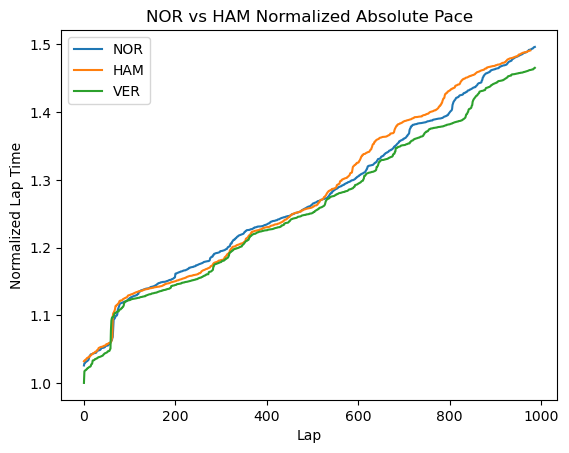

In [118]:
min_time = allDrivers.min().sort_values()[0]
allDrivers_norm = allDrivers.copy()
allDrivers_norm = allDrivers_norm/min_time
# for c in allDrivers.columns:
#     allDrivers_norm[c] = allDrivers_norm[c]/min_time



driver1 = 'NOR'
driver2 = 'HAM'
driver3 = 'VER'

ver_norm = allDrivers_norm[allDrivers_norm[driver1] < allDrivers_norm[driver1].quantile(.8)][driver1].sort_values().reset_index(drop=True)

per_norm = allDrivers_norm[allDrivers_norm[driver2] < allDrivers_norm[driver2].quantile(.8)][driver2].sort_values().reset_index(drop=True)

diver3_norm = allDrivers_norm[allDrivers_norm[driver3] < allDrivers_norm[driver3].quantile(.8)][driver3].sort_values().reset_index(drop=True)

norm = pd.DataFrame()
norm[driver1] = ver_norm
norm[driver2] = per_norm
norm[driver3] = diver3_norm

plt = sns.lineplot(data=norm,dashes=False)
plt.set(xlabel='Lap', ylabel='Normalized Lap Time')
plt.set_title(f'{driver1} vs {driver2} Normalized Absolute Pace')

Text(0.5, 1.0, 'PER vs HAM Normalized Relative Pace')

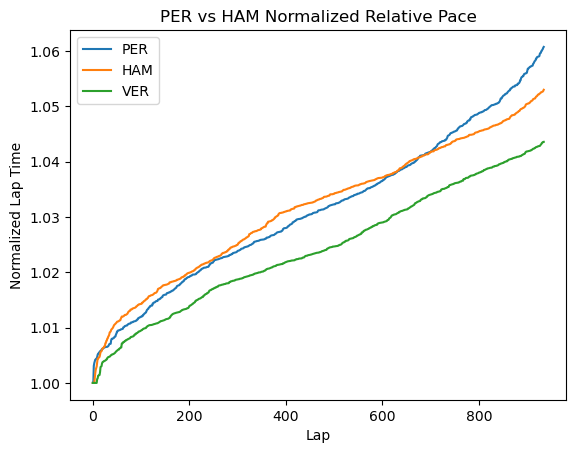

In [122]:
driver1 = 'PER'
driver2 = 'HAM'
driver3 = 'VER'

ver_norm = allDriversNorm[allDriversNorm[driver1] < allDriversNorm[driver1].quantile(.8)][driver1].sort_values().reset_index(drop=True)

per_norm = allDriversNorm[allDriversNorm[driver2] < allDriversNorm[driver2].quantile(.8)][driver2].sort_values().reset_index(drop=True)

diver3_norm = allDriversNorm[allDriversNorm[driver3] < allDriversNorm[driver3].quantile(.8)][driver3].sort_values().reset_index(drop=True)

norm = pd.DataFrame()
norm[driver1] = ver_norm
norm[driver2] = per_norm
norm[driver3] = diver3_norm

plt = sns.lineplot(data=norm,dashes=False)
plt.set(xlabel='Lap', ylabel='Normalized Lap Time')
plt.set_title(f'{driver1} vs {driver2} Normalized Relative Pace')